In [1]:
from collect_data_gen import CustomDataset,create_dataloader,collate_fn
import os
from matplotlib import pyplot as plt
import numpy as np
import torch

from vae import VAE
from pstd.sd.pipeline import rescale
import PIL
import time

from pstd.sd.ddpm import DDPMSampler

# Константы
DATASET_FOLDER = 'game_images_dataset'  # Папка для хранения данных
DATASET_SIZE = 1000  # Количество изображений в датасете
SEQUENCE_LENGTH = 5  # Длина последовательности
IMAGE_HEIGHT = 240  # Установите нужные размеры для изображений
IMAGE_WIDTH = 256
IMAGE_CHANNELS = 3
DATASET_FILENAME = 'game_dataset_gen.npy'  # Имя файла для хранения всех изображений и действий
BATCH_SIZE = 15  # Размер батча для DataLoader

In [2]:
dataloder = create_dataloader(os.path.join(DATASET_FOLDER, DATASET_FILENAME),batch_size=BATCH_SIZE,shuffle=True)
dataset = dataloder.dataset

In [3]:
#for b in dataloder:
#    images,actions = b
#    break
images,actions = dataset[-1]

In [4]:
images = torch.tensor(images)

In [5]:
model = VAE()

model.load_state_dict(torch.load('vae_model.pth',map_location='cpu'))

C:\Users\Skoolz\AppData\Local\Temp\ipykernel_2716\372290456.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('vae_model.pth',map_location

<All keys matched successfully>

In [6]:
with torch.no_grad():
    model.eval()

    images = model.decode(images)

torch.Size([25, 4, 32, 32])


In [7]:
images = rescale(images,(-1,1),(0,255),clamp=True)
#images = images.permute(0,2,3,1).round().numpy()

In [8]:
images.shape

torch.Size([25, 3, 256, 256])

In [9]:
images = images.permute(0,2,3,1)

In [10]:
images.shape

torch.Size([25, 256, 256, 3])

In [11]:
images = images.to(torch.uint8)

In [12]:
images.shape

torch.Size([25, 256, 256, 3])

In [13]:
images = images.numpy()

In [14]:
from IPython.display import display, clear_output

In [15]:
images.shape

(25, 256, 256, 3)

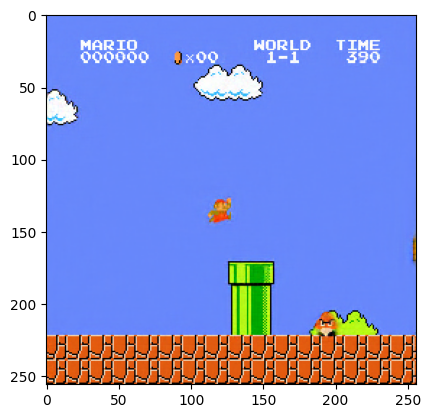

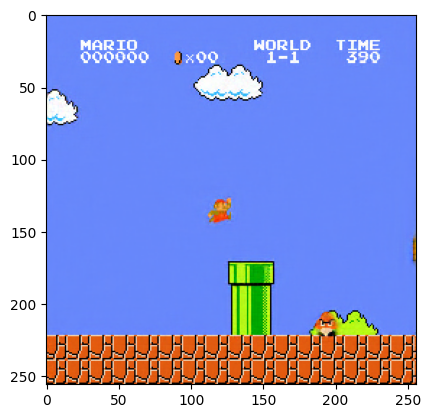

In [16]:
plt.figure()
for i in range(len(images)):
    clear_output(wait=True)  # Очистить предыдущие выводы
    plt.imshow(images[i])  # Отобразить текущее изображение
    display(plt.gcf())  # Принудительно отобразить текущий график
    time.sleep(0.005)  # Задержка для видимого эффекта